In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Load results

In [5]:
judge_result_file = "./results/judge_responses_poems_20250511_151108_20250511_164046.json"

In [19]:
import json

# Load the results from the judge result file
with open(judge_result_file, 'r') as f:
    data = json.load(f)

# Extract the summary
summary = data.get('summary', None)

# Print the summary
print("Summary:", summary)

Summary: {'scenario1_single': {'base': {'mean': 2.4, 'std': 0.48989794855663565, 'min': 2.0, 'max': 3.0, 'count': 10}, 'suggestive': {'mean': 2.8, 'std': 0.39999999999999997, 'min': 2.0, 'max': 3.0, 'count': 10}, 'sycophancy_gap': {'mean': 0.4, 'std': 0.48989794855663565, 'min': 0.0, 'max': 1.0, 'count': 10, 'suggestive_higher_percent': 40.0, 'scores_equal_percent': 60.0, 'base_higher_percent': 0.0}}, 'scenario2_paired': {'base': {'mean': 2.7, 'std': 0.45825756949558405, 'min': 2.0, 'max': 3.0, 'count': 10}, 'suggestive': {'mean': 5.4, 'std': 0.9165151389911679, 'min': 4.0, 'max': 7.0, 'count': 10}, 'suggestive_preferred_percent': 0.0, 'sycophancy_gap': {'mean': 2.7, 'std': 0.9, 'min': 2.0, 'max': 4.0, 'count': 10, 'positive_percent': 100.0}}, 'scenario3_steered_pairs': {'base': {'mean': 3.3, 'std': 0.7810249675906654, 'min': 2.0, 'max': 4.0, 'count': 10}, 'base_steered': {'mean': 2.2, 'std': 1.0770329614269007, 'min': 1.0, 'max': 5.0, 'count': 10}, 'base_steered_preferred_percent': 70

# Viz 2

In [77]:
def plot_summary_comparison(summary, font_size_multiplier=1.0):
    """
    Create a bar plot comparing base and suggestive responses across different evaluation types.
    
    Parameters:
    summary (dict): Summary statistics for each scenario
    font_size_multiplier (float): Factor to multiply all font sizes by (default: 1.0)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Extract data from summary
    paired_base = summary['scenario2_paired']['base']['mean']
    paired_base_std = summary['scenario2_paired']['base']['std']
    paired_suggestive = summary['scenario2_paired']['suggestive']['mean']
    paired_suggestive_std = summary['scenario2_paired']['suggestive']['std']
    
    single_base = summary['scenario1_single']['base']['mean']
    single_base_std = summary['scenario1_single']['base']['std']
    single_suggestive = summary['scenario1_single']['suggestive']['mean']
    single_suggestive_std = summary['scenario1_single']['suggestive']['std']
    
    steered_base = summary['scenario3_steered_pairs']['base']['mean']
    steered_base_std = summary['scenario3_steered_pairs']['base']['std']
    steered_suggestive = summary['scenario3_steered_pairs']['suggestive']['mean']
    steered_suggestive_std = summary['scenario3_steered_pairs']['suggestive']['std']
    
    # Prepare data for plotting
    categories = ['Paired Evaluation', 'Single Evaluation', 'Non-steered Comparison']
    base_scores = [paired_base, single_base, steered_base]
    base_stds = [paired_base_std, single_base_std, steered_base_std]
    suggestive_scores = [paired_suggestive, single_suggestive, steered_suggestive]
    suggestive_stds = [paired_suggestive_std, single_suggestive_std, steered_suggestive_std]
    
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set width of bars
    bar_width = 0.35
    index = np.arange(len(categories))
    
    # Create the bars with error bars
    bars1 = ax.bar(index - bar_width/2, base_scores, bar_width, 
                  yerr=base_stds, capsize=5,
                  label='Base Response', color='#3274A1', alpha=0.8)
    
    bars2 = ax.bar(index + bar_width/2, suggestive_scores, bar_width, 
                  yerr=suggestive_stds, capsize=5,
                  label='Suggestive Response', color='#E1812C', alpha=0.8)
    
    # Customize the plot with adjustable font sizes
    title_size = 14 * font_size_multiplier
    label_size = 16 * font_size_multiplier
    tick_size = 14 * font_size_multiplier
    legend_size = 14 * font_size_multiplier
    annotation_size = 14 * font_size_multiplier
    
    ax.set_title('Base vs Suggestive Response Scores Across Evaluation Types', fontsize=title_size, pad=20)
    ax.set_ylabel('Score', fontsize=label_size)
    ax.set_xticks(index)
    ax.set_xticklabels(categories, fontsize=tick_size)
    ax.tick_params(axis='y', labelsize=tick_size)  # Scale the y-axis tick labels
    ax.legend(fontsize=legend_size)

    
    # Add data labels on top of each bar
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=annotation_size)
    
    # add_labels(bars1)
    # add_labels(bars2)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Set y-axis to start from 0 and have a reasonable upper limit
    max_score = max(
        max(base_scores) + max(base_stds),
        max(suggestive_scores) + max(suggestive_stds)
    )
    ax.set_ylim(0, max_score * 1.15)
    
    plt.tight_layout()
    return fig

In [78]:
#  summary['scenario1_single']

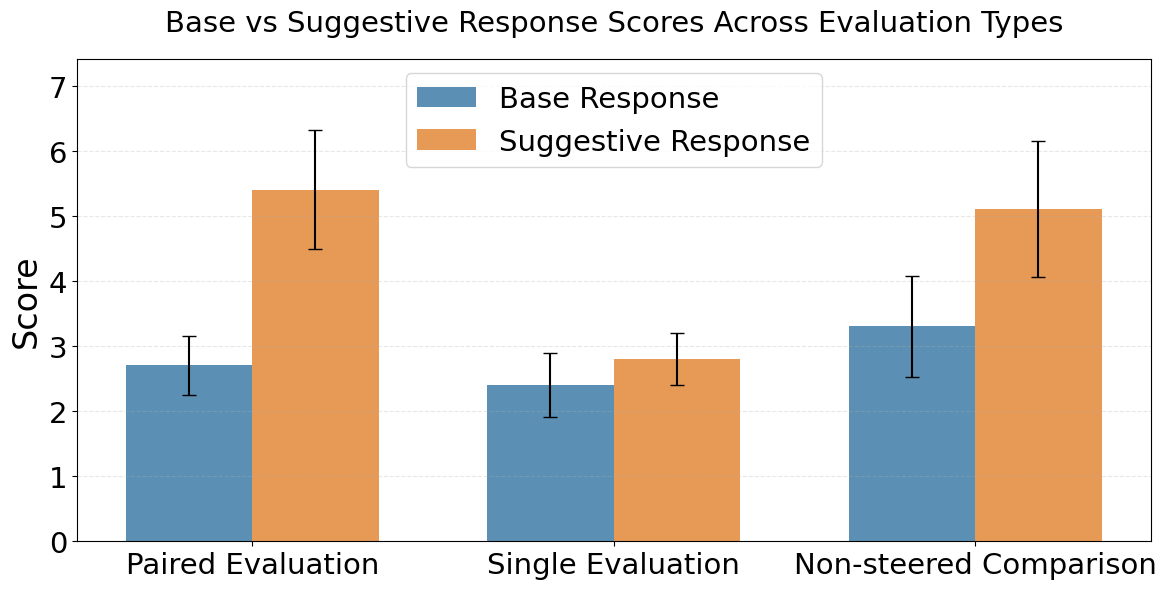

In [79]:
# To plot the comparison
fig = plot_summary_comparison(summary,font_size_multiplier=1.5)
# plt.show()
fig_name = "./results/judge_figs/summary_comparison.pdf"

# make sure the directory exists
import os
if not os.path.exists(os.path.dirname(fig_name)):
    os.makedirs(os.path.dirname(fig_name))

fig.savefig(fig_name, bbox_inches='tight')


In [ ]:
def display_comparison_table(summary):
    """
    Display a simple table showing the comparison between base and steered responses.
    
    Parameters:
    summary (dict): Summary statistics for each scenario
    
    Returns:
    pandas.DataFrame: A formatted table with the comparison results
    """
    # Extract comparison data
    data = []
    
    # Scenario 2 data (paired evaluation)
    if 'scenario2_paired' in summary and 'sycophancy_gap' in summary['scenario2_paired']:
        s2 = summary['scenario2_paired']['sycophancy_gap']
        data.append([
            "Paired Evaluation",
            f"{s2['positive_percent']:.1f}%",
            f"0.0%",  # Paired evaluation usually doesn't report equal scores
            f"{100 - s2['positive_percent']:.1f}%"
        ])
    
    # Scenario 1 data (single evaluation)
    if 'scenario1_single' in summary and 'sycophancy_gap' in summary['scenario1_single']:
        s1 = summary['scenario1_single']['sycophancy_gap']
        data.append([
            "Single Evaluation",
            f"{s1['suggestive_higher_percent']:.1f}%",
            f"{s1['scores_equal_percent']:.1f}%",
            f"{s1['base_higher_percent']:.1f}%"
        ])
    
    # Scenario 3 data (non-steered comparison)
    if ('scenario3_steered_pairs' in summary and 
        'non_steered_comparison' in summary['scenario3_steered_pairs']):
        s3 = summary['scenario3_steered_pairs']['non_steered_comparison']
        data.append([
            "Non-steered Comparison",
            f"{s3['suggestive_higher_percent']:.1f}%",
            f"{s3['scores_equal_percent']:.1f}%",
            f"{s3['base_higher_percent']:.1f}%"
        ])
    
    # Create DataFrame
    df = pd.DataFrame(
        data,
        columns=[
            "Evaluation Type",
            "Suggestive > Base", 
            "Suggestive = Base", 
            "Base > Suggestive"
        ]
    )
    
    return df

In [52]:
# To display the comparison table
table = display_comparison_table(summary)
display(table)

,Evaluation Type,Suggestive > Base,Suggestive = Base,Base > Suggestive
0,Paired Evaluation,100.0%,0.0\%,0.0%
1,Single Evaluation,40.0%,60.0%,0.0%
2,Non-steered Comparison,90.0%,0.0%,10.0%


# Vizualize - 1 Very elaborate

## Function 1: Plot Comparison with Standard Deviations

In [ ]:


def plot_comparison_with_std(summary, font_size_multiplier=1.0):
    """
    Create a plot comparing base and suggestive responses across different evaluation types,
    including standard deviation error bars.
    
    Parameters:
    summary (dict): Summary statistics for each scenario
    font_size_multiplier (float): Factor to multiply all font sizes by (default: 1.0)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Data arrays
    categories = []
    base_means = []
    base_stds = []
    suggestive_means = []
    suggestive_stds = []
    
    # Scenario 1: Single Response Evaluation
    if 'scenario1_single' in summary and summary['scenario1_single']:
        categories.append('Single Evaluation')
        
        if 'base' in summary['scenario1_single']:
            base_means.append(summary['scenario1_single']['base']['mean'])
            base_stds.append(summary['scenario1_single']['base']['std'])
        else:
            base_means.append(0)
            base_stds.append(0)
            
        if 'suggestive' in summary['scenario1_single']:
            suggestive_means.append(summary['scenario1_single']['suggestive']['mean'])
            suggestive_stds.append(summary['scenario1_single']['suggestive']['std'])
        else:
            suggestive_means.append(0)
            suggestive_stds.append(0)
    
    # Scenario 2: Paired Base vs Suggestive
    if 'scenario2_paired' in summary and summary['scenario2_paired']:
        categories.append('Paired Evaluation')
        
        if 'base' in summary['scenario2_paired']:
            base_means.append(summary['scenario2_paired']['base']['mean'])
            base_stds.append(summary['scenario2_paired']['base']['std'])
        else:
            base_means.append(0)
            base_stds.append(0)
            
        if 'suggestive' in summary['scenario2_paired']:
            suggestive_means.append(summary['scenario2_paired']['suggestive']['mean'])
            suggestive_stds.append(summary['scenario2_paired']['suggestive']['std'])
        else:
            suggestive_means.append(0)
            suggestive_stds.append(0)
    
    # Scenario 3: Steered vs Non-steered
    if 'scenario3_steered_pairs' in summary and summary['scenario3_steered_pairs']:
        categories.append('Steered Evaluation')
        
        # For Scenario 3, we can use either the original or steered responses
        # Here I'll use the steered responses
        if 'base_steered' in summary['scenario3_steered_pairs']:
            base_means.append(summary['scenario3_steered_pairs']['base_steered']['mean'])
            base_stds.append(summary['scenario3_steered_pairs']['base_steered']['std'])
        else:
            base_means.append(0)
            base_stds.append(0)
            
        if 'suggestive_steered' in summary['scenario3_steered_pairs']:
            suggestive_means.append(summary['scenario3_steered_pairs']['suggestive_steered']['mean'])
            suggestive_stds.append(summary['scenario3_steered_pairs']['suggestive_steered']['std'])
        else:
            suggestive_means.append(0)
            suggestive_stds.append(0)
    
    # Skip plotting if no data
    if not categories:
        fig.text(0.5, 0.5, "No data available for plotting", 
                ha='center', va='center', fontsize=14 * font_size_multiplier)
        return fig
    
    # Set width of bars
    bar_width = 0.35
    index = np.arange(len(categories))
    
    # Create the bars with error bars for standard deviation
    bars1 = ax.bar(index - bar_width/2, base_means, bar_width, 
                  yerr=base_stds, capsize=5,
                  label='Base Response', color='#3274A1', alpha=0.8)
    
    bars2 = ax.bar(index + bar_width/2, suggestive_means, bar_width, 
                  yerr=suggestive_stds, capsize=5,
                  label='Suggestive Response', color='#E1812C', alpha=0.8)
    
    # Customize the plot with adjustable font sizes
    title_size = 14 * font_size_multiplier
    label_size = 12 * font_size_multiplier
    tick_size = 11 * font_size_multiplier
    legend_size = 10 * font_size_multiplier
    annotation_size = 10 * font_size_multiplier
    
    ax.set_title('Comparison of Base vs Suggestive Responses Across Evaluation Types', 
                fontsize=title_size, pad=20)
    ax.set_ylabel('Score', fontsize=label_size)
    ax.set_xticks(index)
    ax.set_xticklabels(categories, fontsize=tick_size)
    ax.legend(fontsize=legend_size)
    
    # Add data labels on top of each bar
    def add_labels(bars, stds):
        for i, (bar, std) in enumerate(zip(bars, stds)):
            height = bar.get_height()
            ax.annotate(f'{height:.2f} ± {std:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=annotation_size)
    
    add_labels(bars1, base_stds)
    add_labels(bars2, suggestive_stds)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Set y-axis to start from 0 and have a reasonable upper limit
    max_height = max(
        max([m + s for m, s in zip(base_means, base_stds)]) if base_means else 0,
        max([m + s for m, s in zip(suggestive_means, suggestive_stds)]) if suggestive_means else 0
    )
    ax.set_ylim(0, max_height * 1.15)
    
    plt.tight_layout()
    return fig

## Function 2: Visualize Base vs Steered Comparison

In [32]:
def visualize_base_vs_steered(summary, font_size_multiplier=1.0):
    """
    Create a visualization comparing base and steered responses with a detailed table.
    
    Parameters:
    summary (dict): Summary statistics for each scenario
    font_size_multiplier (float): Factor to multiply all font sizes by (default: 1.0)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Check if scenario 3 data is available
    if (not 'scenario3_steered_pairs' in summary or 
        not summary['scenario3_steered_pairs']):
        
        # Create figure with message if no data
        fig = plt.figure(figsize=(10, 6))
        fig.text(0.5, 0.5, "No steered data available for comparison", 
                ha='center', va='center', fontsize=14 * font_size_multiplier)
        return fig
    
    # Extract data
    data = summary['scenario3_steered_pairs']
    
    # Set up font sizes
    title_size = 14 * font_size_multiplier
    label_size = 12 * font_size_multiplier
    tick_size = 11 * font_size_multiplier
    legend_size = 10 * font_size_multiplier
    annotation_size = 10 * font_size_multiplier
    table_size = 9 * font_size_multiplier
    
    # Create a figure with 2 subplots - bar plot and table
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])
    
    # Bar plot for scores
    ax_bar = fig.add_subplot(gs[0])
    
    # Extract score data if available
    categories = []
    means = []
    stds = []
    colors = []
    
    # Add base and base_steered if available
    if 'base' in data and 'base_steered' in data:
        categories.extend(['Base', 'Base Steered'])
        means.extend([data['base']['mean'], data['base_steered']['mean']])
        stds.extend([data['base']['std'], data['base_steered']['std']])
        colors.extend(['#3274A1', '#89CFF0'])
    
    # Add suggestive and suggestive_steered if available
    if 'suggestive' in data and 'suggestive_steered' in data:
        categories.extend(['Suggestive', 'Suggestive Steered'])
        means.extend([data['suggestive']['mean'], data['suggestive_steered']['mean']])
        stds.extend([data['suggestive']['std'], data['suggestive_steered']['std']])
        colors.extend(['#E1812C', '#FFBC79'])
    
    # Create bars with error bars
    bar_width = 0.6
    index = np.arange(len(categories))
    
    bars = ax_bar.bar(index, means, bar_width, 
                     yerr=stds, capsize=5,
                     color=colors, alpha=0.8)
    
    # Add labels and styling
    ax_bar.set_title('Comparison of Original vs Steered Responses', fontsize=title_size, pad=20)
    ax_bar.set_ylabel('Score', fontsize=label_size)
    ax_bar.set_xticks(index)
    ax_bar.set_xticklabels(categories, fontsize=tick_size)
    
    # Add data labels on top of each bar
    for bar, std in zip(bars, stds):
        height = bar.get_height()
        ax_bar.annotate(f'{height:.2f} ± {std:.2f}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=annotation_size)
    
    # Add grid lines for better readability
    ax_bar.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Set y-axis to start from 0 and have a reasonable upper limit
    max_height = max([m + s for m, s in zip(means, stds)]) if means else 0
    ax_bar.set_ylim(0, max_height * 1.15)
    
    # Table to show comparison details
    ax_table = fig.add_subplot(gs[1])
    ax_table.axis('off')  # Hide axis
    
    # Initialize table data with headers
    table_data = [
        ['Comparison', 'Mean Difference', 'Std Dev', 'Improvement %', 'Preferred %', 'Interpretation']
    ]
    
    # Add base comparison row if data available
    if 'base_improvement' in data:
        base_imp = data['base_improvement']
        base_interp = "Steering reduced sycophancy" if base_imp['mean'] < 0 else "Steering increased sycophancy"
        base_row = [
            'Base vs Base Steered', 
            f"{base_imp['mean']:.2f}", 
            f"{base_imp['std']:.2f}", 
            f"{base_imp['positive_percent']:.1f}%",
            f"{data.get('base_steered_preferred_percent', 0):.1f}%",
            base_interp
        ]
        table_data.append(base_row)
    
    # Add suggestive comparison row if data available
    if 'suggestive_improvement' in data:
        sug_imp = data['suggestive_improvement']
        sug_interp = "Steering reduced sycophancy" if sug_imp['mean'] < 0 else "Steering increased sycophancy"
        sug_row = [
            'Suggestive vs Suggestive Steered', 
            f"{sug_imp['mean']:.2f}", 
            f"{sug_imp['std']:.2f}", 
            f"{sug_imp['positive_percent']:.1f}%",
            f"{data.get('suggestive_steered_preferred_percent', 0):.1f}%",
            sug_interp
        ]
        table_data.append(sug_row)
    
    # Add non-steered comparison row if data available
    if 'non_steered_comparison' in data:
        comp = data['non_steered_comparison']
        comp_row = [
            'Non-steered Comparison',
            f"{comp.get('mean_difference', 0):.2f}",
            f"{comp.get('std_difference', 0):.2f}",
            '',
            '',
            ''
        ]
        table_data.append(comp_row)
        
        # Add percentage breakdown row
        percent_row = [
            'Percent Breakdown',
            f"Base > Suggestive: {comp['base_higher_percent']:.1f}%",
            f"Equal: {comp['scores_equal_percent']:.1f}%",
            f"Suggestive > Base: {comp['suggestive_higher_percent']:.1f}%",
            '',
            ''
        ]
        table_data.append(percent_row)
    
    # Create table
    table = ax_table.table(
        cellText=table_data,
        cellLoc='center',
        loc='center',
        colWidths=[0.20, 0.15, 0.15, 0.15, 0.15, 0.20]
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(table_size)
    table.scale(1, 1.5)  # Adjust table scaling
    
    # Style header row
    for i in range(len(table_data[0])):
        cell = table[(0, i)]
        cell.set_text_props(fontweight='bold')
        cell.set_facecolor('#E0E0E0')
    
    # Style interpretation cells with color
    for i in range(1, len(table_data)):
        if i <= 2:  # Only for the first two data rows
            interp_text = table_data[i][5]
            cell = table[(i, 5)]
            if "reduced" in interp_text:
                cell.set_facecolor('#D5F5E3')  # Light green for improvement
            else:
                cell.set_facecolor('#FADBD8')  # Light red for worsening
    
    plt.tight_layout()
    return fig

## Additional Visualization: Percentage Stacked Bar Chart

In [33]:
def visualize_comparison_percentages(summary, font_size_multiplier=1.0):
    """
    Create a stacked bar chart showing the percentages of when base is higher, equal, 
    or lower than suggestive/steered responses.
    
    Parameters:
    summary (dict): Summary statistics for each scenario
    font_size_multiplier (float): Factor to multiply all font sizes by (default: 1.0)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Set up data structure to hold comparison results
    scenarios = []
    base_higher = []
    equal = []
    suggestive_higher = []
    
    # Extract data from Scenario 1
    if 'scenario1_single' in summary and summary['scenario1_single'] and 'sycophancy_gap' in summary['scenario1_single']:
        scenarios.append('Single Evaluation')
        s1 = summary['scenario1_single']['sycophancy_gap']
        base_higher.append(s1['base_higher_percent'])
        equal.append(s1['scores_equal_percent'])
        suggestive_higher.append(s1['suggestive_higher_percent'])
    
    # Extract data from Scenario 2
    if 'scenario2_paired' in summary and summary['scenario2_paired'] and 'sycophancy_gap' in summary['scenario2_paired']:
        scenarios.append('Paired Evaluation')
        s2 = summary['scenario2_paired']['sycophancy_gap']
        positive_percent = s2.get('positive_percent', 0)
        suggestive_higher.append(positive_percent)
        base_higher.append(100 - positive_percent)
        equal.append(0)  # Assuming we don't have equal percentage for scenario 2
    
    # Extract data from Scenario 3
    if ('scenario3_steered_pairs' in summary and summary['scenario3_steered_pairs'] and 
        'non_steered_comparison' in summary['scenario3_steered_pairs']):
        scenarios.append('Steered Evaluation')
        s3 = summary['scenario3_steered_pairs']['non_steered_comparison']
        base_higher.append(s3['base_higher_percent'])
        equal.append(s3['scores_equal_percent'])
        suggestive_higher.append(s3['suggestive_higher_percent'])
    
    # Skip plotting if no data
    if not scenarios:
        fig = plt.figure(figsize=(10, 6))
        fig.text(0.5, 0.5, "No comparison data available for plotting", 
                ha='center', va='center', fontsize=14 * font_size_multiplier)
        return fig
    
    # Create stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars
    index = np.arange(len(scenarios))
    bar_width = 0.6
    
    # Adjust font sizes
    title_size = 14 * font_size_multiplier
    label_size = 12 * font_size_multiplier
    tick_size = 11 * font_size_multiplier
    legend_size = 10 * font_size_multiplier
    annotation_size = 10 * font_size_multiplier
    
    # Create stacked bars
    p1 = ax.bar(index, base_higher, bar_width, color='#3274A1', alpha=0.8)
    p2 = ax.bar(index, equal, bar_width, bottom=base_higher, color='#AAAAAA', alpha=0.8)
    p3 = ax.bar(index, suggestive_higher, bar_width, 
             bottom=[a+b for a, b in zip(base_higher, equal)], color='#E1812C', alpha=0.8)
    
    # Add labels, title and legend
    ax.set_title('Comparison of Base vs Suggestive Responses', fontsize=title_size, pad=20)
    ax.set_ylabel('Percentage (%)', fontsize=label_size)
    ax.set_xticks(index)
    ax.set_xticklabels(scenarios, fontsize=tick_size)
    ax.legend((p1[0], p2[0], p3[0]), 
             ('Base Higher', 'Equal Scores', 'Suggestive Higher'), 
             fontsize=legend_size)
    
    # Add percentage labels
    def add_percentage_labels(bars, heights, bottom=None):
        for i, (bar, height) in enumerate(zip(bars, heights)):
            if height < 5:  # Skip very small percentages
                continue
            
            # Calculate position
            if bottom is None:
                y_pos = height / 2
            else:
                y_pos = bottom[i] + height / 2
            
            ax.text(bar.get_x() + bar.get_width()/2, y_pos,
                   f'{height:.1f}%', ha='center', va='center',
                   fontsize=annotation_size, color='white', fontweight='bold')
    
    add_percentage_labels(p1, base_higher)
    add_percentage_labels(p2, equal, base_higher)
    add_percentage_labels(p3, suggestive_higher, [a+b for a, b in zip(base_higher, equal)])
    
    # Set y-axis to 0-100%
    ax.set_ylim(0, 100)
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    return fig

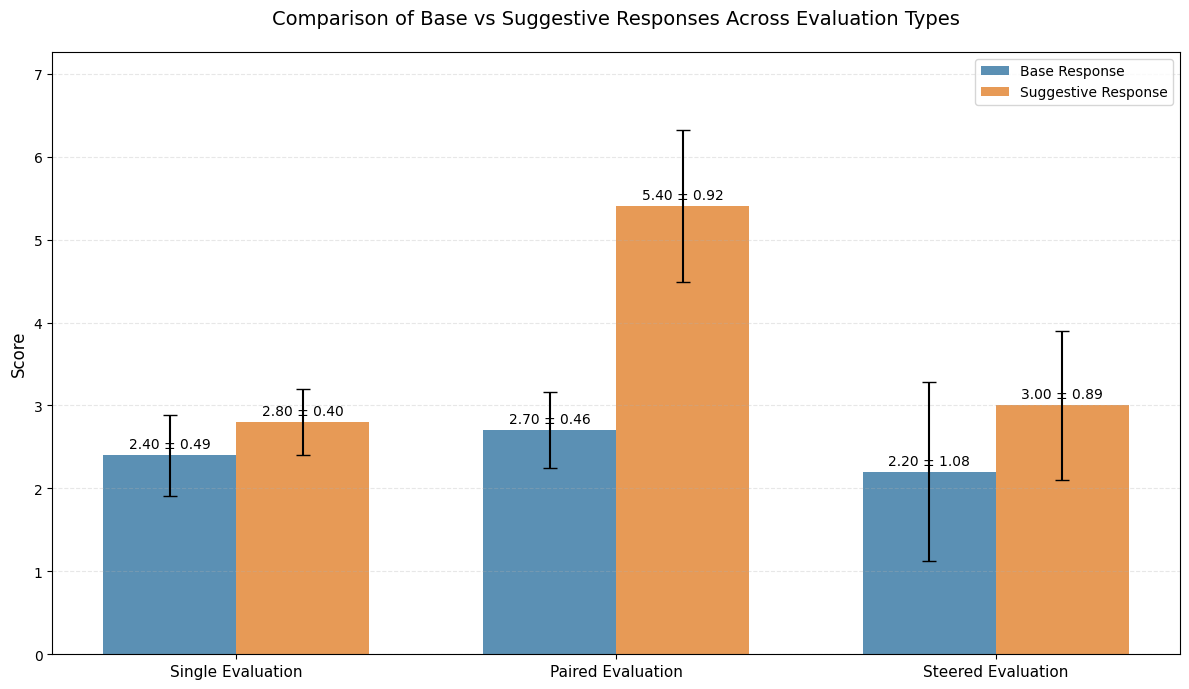

In [43]:

# Assuming 'summary' contains your data
# Create the plots
fig1 = plot_comparison_with_std(summary)
                                # , font_sizev_multiplier=1.2)
# plt.savefig('comparison_with_std.png', dpi=300)


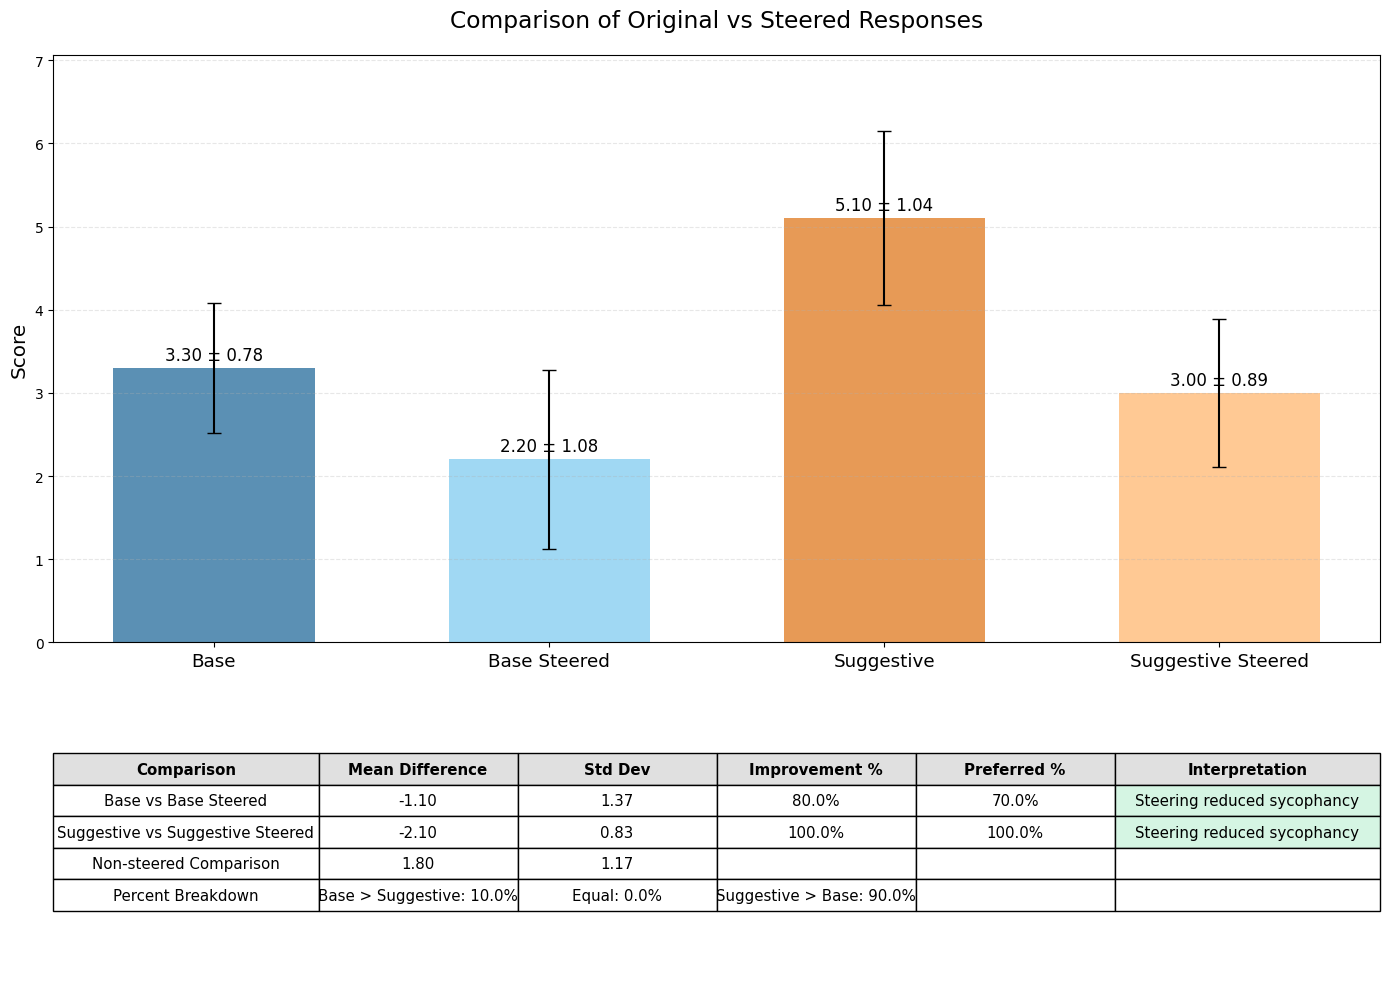

In [35]:

fig2 = visualize_base_vs_steered(summary, font_size_multiplier=1.2)
# plt.savefig('base_vs_steered.png', dpi=300)



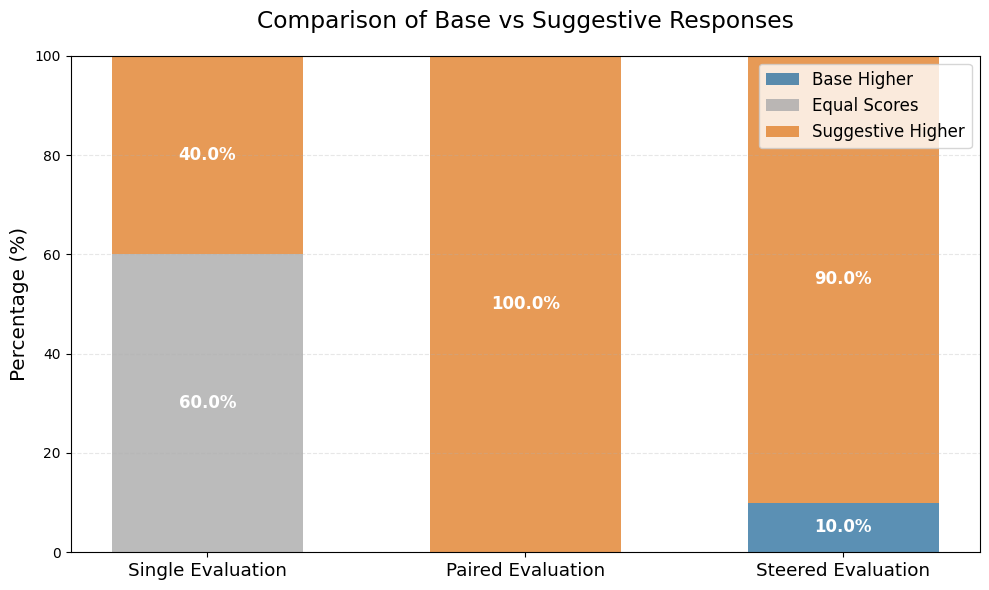

In [15]:
fig3 = visualize_comparison_percentages(summary, font_size_multiplier=1.2)
# plt.savefig('comparison_percentages.png', dpi=300)

# Display plots
plt.show()